   ### EDA Project on Facebook Database
   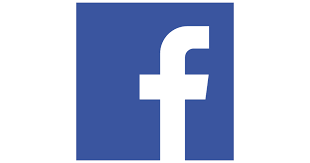
                                       


## Table Of Contents:

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
4. [Data Description](#section4)<br>
5. [Pandas Profiling before Data Pre-processing](#section5)<br>
6. [Data Pre-Processing](#section6)<br>
7. [Data Post Profiling](#section7)<br>
8. [Exploratory Data Analysis](#section8)<br>
9. [Summarization](#section9)<br>
9.1 [Conclusion](#section9.1)<br>
9.2 [Actionable Insights](#section9.2)<br>



<a id=section1></a>
## 1. Problem Statement

Facebook is an American online social media and social networking service based in Menlo Park, California and a flagship service of the namesake company Facebook, Inc. It was founded by Mark Zuckerberg, along with fellow Harvard College students and roommates Eduardo Saverin, Andrew McCollum, Dustin Moskovitz and Chris Hughes.



Based on the Facebook Dataset provided, 
we are supposed to find out how user is engaged with Facebook application. 
We will try to discover popularity of facebook, preferred usage method etc. to get 
better understanding of the data. 
Depending on the analysys we will provide 
valuable insights to enhance the application.


<a id=section2></a>
## 2. Importing Packages

In [129]:
import numpy as np
np.set_printoptions(precision=4)    

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50  

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)



In [130]:
!pip install chart-studio


In [3]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in d:\shraddha-study\ds\myanaconda\lib\site-packages (3.1.0)


<a id=section3></a>
## 3. Loading Data 

In [131]:
#Importing Facebook Dataset
import pandas as pd
dffb=pd.read_csv("D:/Shraddha-study/Project-work/facebook_data.csv")
dffb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<a id=section4></a>
## 4. Data Description

Here we are trying to understand the dataset by studying about the shape and size of our data.We also figure out the columns in our dataset.

In [132]:
print(dffb.shape)
print("Facebook Dataset has {rows} rows and {columns} columns".format(rows=dffb.shape[0],columns=dffb.shape[1]))
print("\n Below columns exist in our database: \n ")
print(dffb.columns)

(99003, 15)
Facebook Dataset has 99003 rows and 15 columns

 Below columns exist in our database: 
 
Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')


### Here is a concise summary of our data and its description

In [133]:
dffb.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


##### From the describe(), we can see the statiscal observations for each column. One interesting observation about 'Age' column is that it reflects minimum age as 13 which is correct but the maximum age is 113 which points it out be an outlier. 

In [134]:
dffb.info()
print("\n")
print("Facebook Dataset has {rows} rows and {columns} columns".format(rows=dffb.shape[0],columns=dffb.shape[1]))
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

#### 1. Using the info(), we have identified that there are missing values in 'gender' and 'tenure' columns.
#### 2. We see that the datatype for all columns is int64, except for gender and tenure. It would make sense to combine dob_day, dob_month, dob_year as one single column.

In [135]:
#WE will now find out how much data is missing and and its percentage.


total=dffb.isnull().sum().sort_values(ascending=False)
percent=((dffb.isnull().sum()/dffb.isnull().count())*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data


,total,percent
gender,175,0.176762
tenure,2,0.002020
www_likes_received,0,0.000000
www_likes,0,0.000000
mobile_likes_received,0,0.000000
mobile_likes,0,0.000000
likes_received,0,0.000000
likes,0,0.000000
friendships_initiated,0,0.000000
friend_count,0,0.000000


##### From the above derived data, we see there are 175 missing values in gender and 2 missing values in tenure. 

<a id=section5></a>
## 5. Pandas Profiling Before Pre-processing

In [136]:
import pandas_profiling                                                                                               
profile = pandas_profiling.ProfileReport(dffb)
profile.to_file("dffb_pre_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### We have observed similar results for missing values from Profile report as from our manual calculation. There is much more to the Profile report that including a brief observation for each of the columns in the dataset, the heatmap describing the correlation etc.

<a id=section6></a>
## 6. Data Pre-processing 

##### Lets start treating the missing values. 
##### 1. Gender is categorical so we replace it by the mode.
##### 2. Tenure is integer so we replace it by mean

In [137]:
dffb.gender.unique()

array(['male', 'female', nan], dtype=object)

In [138]:
dffb.gender.mode()

0    male
dtype: object

In [139]:
dffb['gender']=dffb['gender'].fillna(dffb['gender'].mode()[0])

In [140]:
print(dffb.gender.unique(),"\nThere are no missing values in gender column now")

['male' 'female'] 
There are no missing values in gender column now


#### Now, we know that there are only 2 missing values in 'tenure'column. Since it is of integer datatype, we can use its mean to replace the missing values in 'tenure'

In [141]:
print(dffb['tenure'].min(),": is mininum value in 'tenure' column\n")
print(dffb['tenure'].max(),": is maximum value in 'tenure' column\n")
dffb['tenure']=dffb['tenure'].fillna(dffb['tenure'].mean())
print("Now there are no missing values in 'tenure' column,there are:", dffb['tenure'].shape[0],"entries")

0.0 : is mininum value in 'tenure' column

3139.0 : is maximum value in 'tenure' column

Now there are no missing values in 'tenure' column,there are: 99003 entries


##### We now work on the outliers present in age column. We are assuming 80 is the maximum age of the person using Facebook. We are using a function to determine the number of outliers in age

In [142]:
def correct_age(ages):
    if ages>80:
        return True
    else:
        return False
        
print("There are {} users whose age is above 80".format(sum(dffb['age'].apply(lambda x:correct_age(x)))))

There are 5723 users whose age is above 80


In [16]:
#dffb[dffb['age']>80]['age']                            -----Using query instead of function

##### There are 5723 values of ages greater than 80. So we cannot delete the rows nor we can delete that column as it would be useful for analysis. Here we cannot use mean as the outliers will pull the mean towards themselves. The best apprach is to replace the outliers by median. 

In [143]:
med=dffb.age.median()
dffb.loc[dffb.age>80, 'age']=med


In [144]:
dffb[dffb['age']>80]['age']

Series([], Name: age, dtype: float64)

## 7. Data Post Profiling
<a id=section6></a>

##### We can observe now there are no missing values and oultliers in our Dataset.

In [145]:
profile = pandas_profiling.ProfileReport(dffb)
profile.to_file("dffb_post1_profiling.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 8. Exploratory Data Analysis
<a id=section8></a>

##### We will merge the three colums dob_date, dob_month, dob_year which can be merged to a single column "dob"

In [146]:
dffb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14.0,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14.0,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14.0,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14.0,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14.0,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [147]:
import datetime
dffb["dob"]=pd.to_datetime(dffb["dob_day"].astype(str) + "/" + dffb["dob_month"].astype(str)+ "/" + dffb["dob_year"].astype(str))
dffb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
0,2094382,14.0,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1,1192601,14.0,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,1999-02-11
2,2083884,14.0,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
3,1203168,14.0,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
4,1733186,14.0,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,1999-04-12


##### We will now drop the columns dob_day and dob_month



In [23]:
dffb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 99003 non-null  int64         
 1   age                    99003 non-null  float64       
 2   dob_day                99003 non-null  int64         
 3   dob_year               99003 non-null  int64         
 4   dob_month              99003 non-null  int64         
 5   gender                 99003 non-null  object        
 6   tenure                 99003 non-null  float64       
 7   friend_count           99003 non-null  int64         
 8   friendships_initiated  99003 non-null  int64         
 9   likes                  99003 non-null  int64         
 10  likes_received         99003 non-null  int64         
 11  mobile_likes           99003 non-null  int64         
 12  mobile_likes_received  99003 non-null  int64         
 13  w

In [148]:
dffb.drop('dob_day',axis=1,inplace=True)

In [149]:
dffb.drop('dob_month',axis=1,inplace=True)

In [150]:
dffb.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
0,2094382,14.0,1999,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1,1192601,14.0,1999,female,6.0,0,0,0,0,0,0,0,0,1999-02-11
2,2083884,14.0,1999,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
3,1203168,14.0,1999,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
4,1733186,14.0,1999,male,82.0,0,0,0,0,0,0,0,0,1999-04-12


##### Here is the final data available for our analysis

##### 1. Based on the likes received via website and app, we can find out which option is preferred more by users. We can therefore conclude that users prefer mobile app for Facebook.

In [151]:
wlikes=dffb['www_likes_received'].sum()
mlikes=dffb['mobile_likes_received'].sum()
print("website likes are: {} and Mobile likes are {}".format(wlikes,mlikes))

website likes are: 5798490 and Mobile likes are 8328181


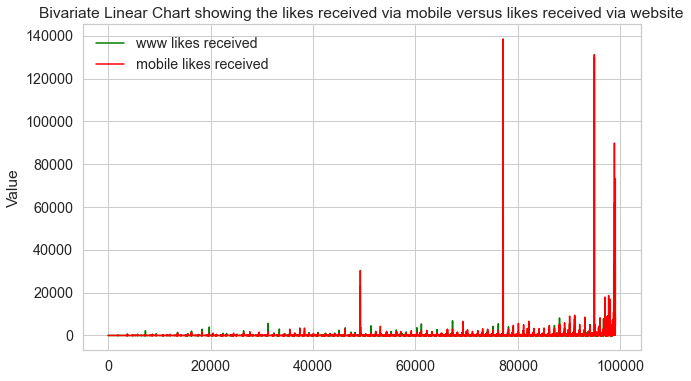

In [177]:
dffb['www_likes_received'].plot(kind='line', figsize=(10, 6), color='green')
dffb['mobile_likes_received'].plot(kind='line', figsize=(10, 6), color='red')

plt.ylabel('Value')
plt.title('Bivariate Linear Chart showing the likes received via mobile versus likes received via website')
plt.legend(['www likes received', 'mobile likes received'])

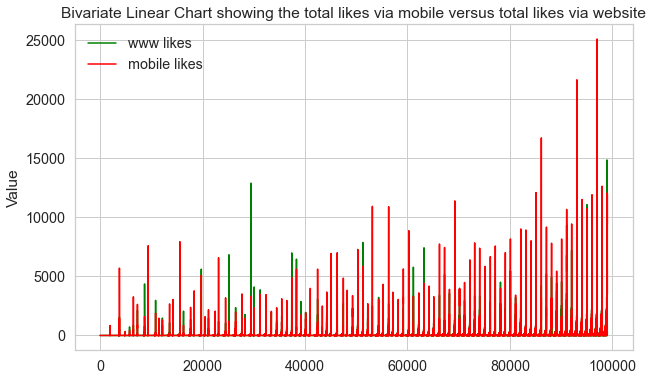

In [178]:
dffb['www_likes'].plot(kind='line', figsize=(10, 6), color='green')
dffb['mobile_likes'].plot(kind='line', figsize=(10, 6), color='red')

plt.ylabel('Value')
plt.title('Bivariate Linear Chart showing the total likes via mobile versus total likes via website')
plt.legend(['www likes', 'mobile likes'])


##### 2. Determining the popularity of Facebook under various age groups

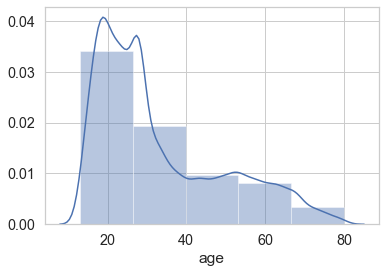

In [153]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 
%matplotlib inline
sns.distplot(dffb['age'],bins=5)


##### Observations from Distplot:
###### Facebook is most popular within the age group of 20-30, followed by under 20 age group. Facebook is least popular amongst the Age group between 60-80


##### 3. We will find the males and female users accessing facebook with the help of a pie chart

Text(0.5, 1.0, 'No.of males and female users on Facebook')

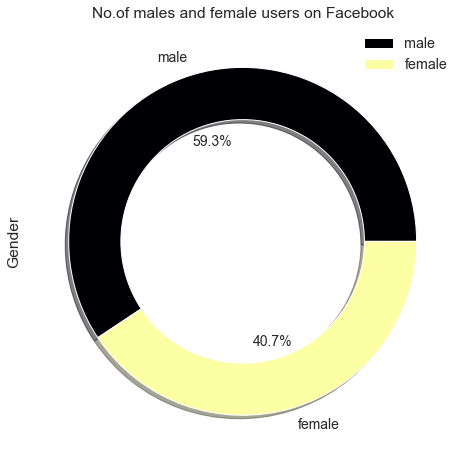

In [175]:
dffb['gender'].value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.30), 
                                       shadow=True, figsize=(8,8), cmap='inferno', legend=True)

plt.ylabel('Gender')
plt.title('No.of males and female users on Facebook')

#### Observations from Pie Chart:
##### 59.3% of the Facebook users are males and 40.7% are females

In [154]:
df_clone = dffb.copy()
df_clone.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
0,2094382,14.0,1999,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1,1192601,14.0,1999,female,6.0,0,0,0,0,0,0,0,0,1999-02-11
2,2083884,14.0,1999,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
3,1203168,14.0,1999,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
4,1733186,14.0,1999,male,82.0,0,0,0,0,0,0,0,0,1999-04-12


In [93]:
dffb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 99003 non-null  int64         
 1   age                    99003 non-null  float64       
 2   dob_year               99003 non-null  int64         
 3   gender                 99003 non-null  object        
 4   tenure                 99003 non-null  float64       
 5   friend_count           99003 non-null  int64         
 6   friendships_initiated  99003 non-null  int64         
 7   likes                  99003 non-null  int64         
 8   likes_received         99003 non-null  int64         
 9   mobile_likes           99003 non-null  int64         
 10  mobile_likes_received  99003 non-null  int64         
 11  www_likes              99003 non-null  int64         
 12  www_likes_received     99003 non-null  int64         
 13  d

In [158]:
dffb_new.head()

,userid,age,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob
0,0.916919,0.014925,0.99,male,0.084740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989530
1,0.161364,0.014925,0.99,female,0.001911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981908
2,0.908123,0.014925,0.99,male,0.004141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989449
3,0.170217,0.014925,0.99,female,0.029627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990506
4,0.614292,0.014925,0.99,male,0.026123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983535


In [128]:
dffb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 99003 non-null  int64         
 1   age                    99003 non-null  float64       
 2   dob_year               99003 non-null  int64         
 3   gender                 99003 non-null  object        
 4   tenure                 99003 non-null  float64       
 5   friend_count           99003 non-null  int64         
 6   friendships_initiated  99003 non-null  int64         
 7   likes                  99003 non-null  int64         
 8   likes_received         99003 non-null  int64         
 9   mobile_likes           99003 non-null  int64         
 10  mobile_likes_received  99003 non-null  int64         
 11  www_likes              99003 non-null  int64         
 12  www_likes_received     99003 non-null  int64         
 13  d

In [31]:
dffb['tenure'].min()
dffb['tenure'].max()

3139.0

In [ ]:
dffb.head()

##### 4 Let' s try to find the relation between the facebook users and their tenure

Text(0.5, 1.0, 'Hexplot for Facebook users and their tenure')

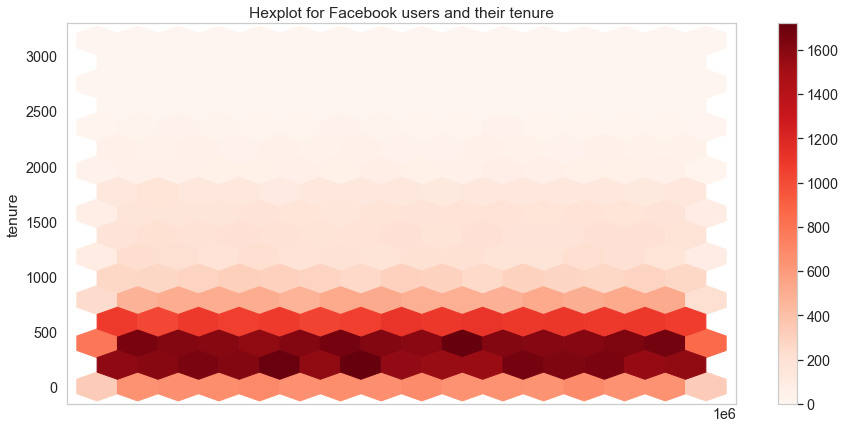

In [179]:
# Using pandas plot function to plot the scatter plot for the userid and tenure columns.


dffb.plot(kind='hexbin', x='userid', y='tenure', figsize=(15, 7), gridsize=15,colormap='Reds', grid=False)

plt.title('Hexplot for Facebook users and their tenure')


##### Based on the above hexplot, we can say that most of the Facebook users are have a tenure of 500 days

##### 5. Using pairplot function, we will try to find the pairwise relations between numerical features

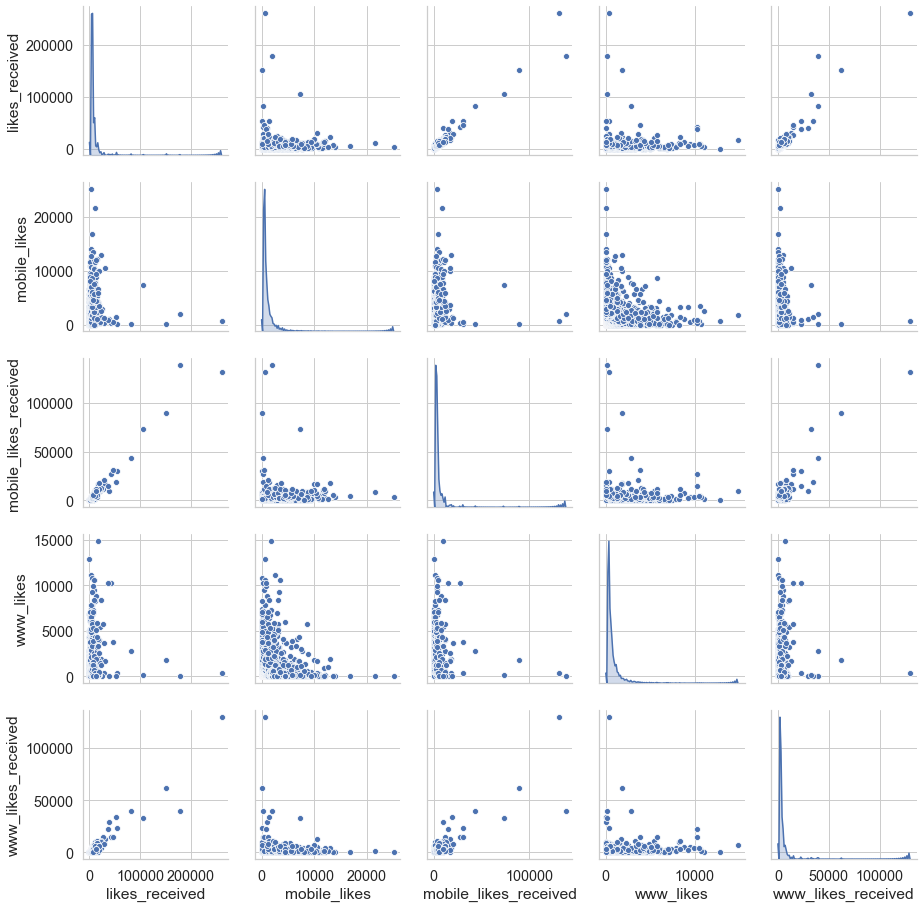

In [180]:
sns.pairplot(data=dffb[['likes_received', 'mobile_likes', 'mobile_likes_received','www_likes','www_likes_received']], size=2.5, diag_kind='kde')

##### 6. We will now try to find out if friend count is related to gender. 

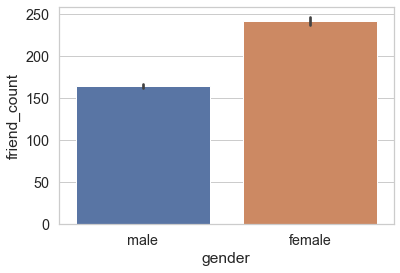

In [62]:
sns.barplot(x='gender',y='friend_count',data=dffb)

##### We can conclude that female users on facebook have a higher friend count as compared to males.


##### 7. We will find out the correalation between various features.

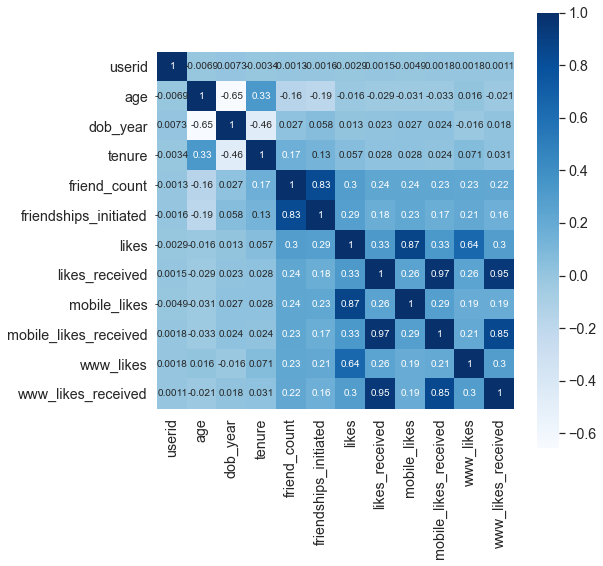

In [32]:
features_correlation = dffb.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Blues')

##### friendship_initiated and friend_count, mobile_likes_received and likes_received, www_likes_received and likes_received are highly correlated with each other.

##### 8. How does gender relate to the total likes received by an individual

Text(0.5, 1.0, 'Gender vs Likes')

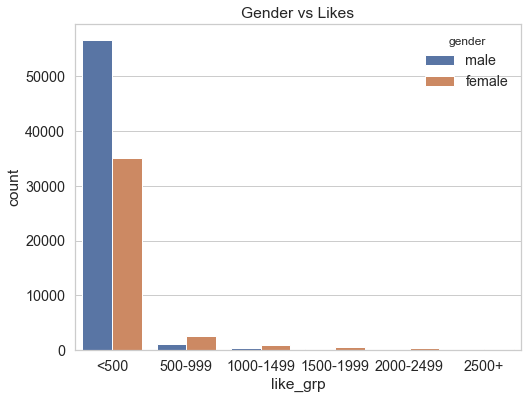

In [121]:
#print(dffb.likes.min())
#print(dffb.likes.max())

dffb_new=dffb.copy()

dffb['like_grp'] = pd.cut(dffb_new['likes'].dropna(),
                         [0,500,1000,1500,2000,2500,3000],
                         labels=['<500','500-999','1000-1499','1500-1999','2000-2499','2500+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = dffb_new,x = 'like_grp', hue='gender')
plt.title('Gender vs Likes')

##### We can say that number of likes for any post is mostly in the range of below 500, where males enjoy a greater share of the total likes.
##### There are few likes in the range higher than 500, where females have greater share of likes.

<a id=section9></a>
## 9. Summarization

##### The Explanatory Data Analysis for Facebook Data Set has been carried out by working on the following:
  ##### 1. We cleaned data by replacing the NaN values and outliers present in gender and age column resp.
  ##### 2. With the helpof EDA using matpltlib and seaborn we have tried to visualize our understanding of this dataset
    

<a id=section9.1></a>
## 9.1 Conclusion

#### Based on the analysis we can conclude the following:
    1. Facebook users prefer mobile app over the website login
    2. Most of the facebook users are in the age group of 20-40
    3. Users who initiate more friendships are the ones with higher friend count
    4. Most of the people on facebook have a tenure of 500 days which is more than a year but less than two.
    4. Females tend to have more friend count than males.
    5. It is observed male facebook users are the ones who receive majority of the likes.
    
    

<a id=section9.2></a>
## 9.2 Actionable Insights

Facebook users mostly have a active tenure until 2 years. This could be due to other social media apps in the market. FB can stay in touch with the users not only by sending Birthday Greeting or Friendversary Reminder but it could be more proactive by reminding them on the day they created FB account. Also, by adding some special rewards like lucky draw spins, discount coupons for the FB joining date of the user. 

There are many users who have 0 likes or received 0 likes. This is due users not being very active on tha app.To add on more users to be active on Facebook, FB can initiate contests for most active user of the year in each country/state etc. based on the number of likes and post shared. This will get back the attention of most of the users on FB.